In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


621

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lincoln
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | portland
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | russell
Processing Record 16 of Set 1 | saint-georges
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | palmer
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | imbituba
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processing Record

Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | salgueiro
Processing Record 41 of Set 4 | yeppoon
Processing Record 42 of Set 4 | airai
Processing Record 43 of Set 4 | fort nelson
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | bethel
Processing Record 47 of Set 4 | nome
Processing Record 48 of Set 4 | rozkishne
Processing Record 49 of Set 4 | phonhong
Processing Record 50 of Set 4 | leshan
Processing Record 1 of Set 5 | margate
Processing Record 2 of Set 5 | san giovanni rotondo
Processing Record 3 of Set 5 | rossland
Processing Record 4 of Set 5 | conakry
Processing Record 5 of Set 5 | port augusta
Processing Record 6 of Set 5 | ca mau
Processing Record 7 of Set 5 | victoria
Processing Record 8 of Set 5 | strelka
Processing Record 9 of Set 5 | ternate
Processing Record 10 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 11 o

Processing Record 27 of Set 8 | athni
Processing Record 28 of Set 8 | muisne
Processing Record 29 of Set 8 | rancho palos verdes
Processing Record 30 of Set 8 | berlevag
Processing Record 31 of Set 8 | lakes entrance
Processing Record 32 of Set 8 | bubaque
Processing Record 33 of Set 8 | manzil jamil
City not found. Skipping...
Processing Record 34 of Set 8 | nampa
Processing Record 35 of Set 8 | davila
Processing Record 36 of Set 8 | jimo
Processing Record 37 of Set 8 | lagoa
Processing Record 38 of Set 8 | jiddah
City not found. Skipping...
Processing Record 39 of Set 8 | moron
Processing Record 40 of Set 8 | hohhot
Processing Record 41 of Set 8 | tansen
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | bonfim
Processing Record 44 of Set 8 | vao
Processing Record 45 of Set 8 | yirol
City not found. Skipping...
Processing Record 46 of Set 8 | kutulik
Processing Record 47 of Set 8 | baneh
Processing Record 48 of Set 8 | satitoa
City not found. Skipping...
Processi

Processing Record 11 of Set 12 | esil
Processing Record 12 of Set 12 | husavik
Processing Record 13 of Set 12 | abu dhabi
Processing Record 14 of Set 12 | bowen
Processing Record 15 of Set 12 | barcelona
Processing Record 16 of Set 12 | mounana
Processing Record 17 of Set 12 | hambantota
Processing Record 18 of Set 12 | puerto carreno
Processing Record 19 of Set 12 | dukat
Processing Record 20 of Set 12 | kushima
Processing Record 21 of Set 12 | mocuba
Processing Record 22 of Set 12 | kloulklubed
Processing Record 23 of Set 12 | wuchang
Processing Record 24 of Set 12 | nikolsk
Processing Record 25 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 26 of Set 12 | zeya
Processing Record 27 of Set 12 | hualmay
Processing Record 28 of Set 12 | wanning
Processing Record 29 of Set 12 | envira
Processing Record 30 of Set 12 | artyk
City not found. Skipping...
Processing Record 31 of Set 12 | rorvik
Processing Record 32 of Set 12 | yakeshi
Processing Record 33 of Set 12 | 

In [12]:
# Tally the number of cities in the city_data array to ensure over 500
len(city_data)

564

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lincoln,40.8000,-96.6670,50.38,34,94,1.99,US,2022-02-01 03:23:39
1,Hithadhoo,-0.6000,73.0833,82.45,72,9,12.62,MV,2022-02-01 03:28:16
2,Upernavik,72.7868,-56.1549,-20.67,99,99,6.22,GL,2022-02-01 03:28:16
3,Portland,45.5234,-122.6762,42.57,88,75,1.01,US,2022-02-01 03:24:26
4,Saint George,37.1041,-113.5841,52.54,28,0,1.01,US,2022-02-01 03:28:17
5,Mar Del Plata,-38.0023,-57.5575,63.88,59,0,5.01,AR,2022-02-01 03:25:15
6,Esperance,-33.8667,121.9000,67.84,51,57,16.53,AU,2022-02-01 03:28:17
7,Tuatapere,-46.1333,167.6833,76.51,45,100,2.46,NZ,2022-02-01 03:27:47
8,Vaini,-21.2000,-175.2000,80.83,72,62,13.91,TO,2022-02-01 03:28:17
9,Dikson,73.5069,80.5464,-0.15,89,100,20.15,RU,2022-02-01 03:28:18


In [14]:
#Reorder Columns in city_data dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lincoln,US,2022-02-01 03:23:39,40.8000,-96.6670,50.38,34,94,1.99
1,Hithadhoo,MV,2022-02-01 03:28:16,-0.6000,73.0833,82.45,72,9,12.62
2,Upernavik,GL,2022-02-01 03:28:16,72.7868,-56.1549,-20.67,99,99,6.22
3,Portland,US,2022-02-01 03:24:26,45.5234,-122.6762,42.57,88,75,1.01
4,Saint George,US,2022-02-01 03:28:17,37.1041,-113.5841,52.54,28,0,1.01
5,Mar Del Plata,AR,2022-02-01 03:25:15,-38.0023,-57.5575,63.88,59,0,5.01
6,Esperance,AU,2022-02-01 03:28:17,-33.8667,121.9000,67.84,51,57,16.53
7,Tuatapere,NZ,2022-02-01 03:27:47,-46.1333,167.6833,76.51,45,100,2.46
8,Vaini,TO,2022-02-01 03:28:17,-21.2000,-175.2000,80.83,72,62,13.91
9,Dikson,RU,2022-02-01 03:28:18,73.5069,80.5464,-0.15,89,100,20.15


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

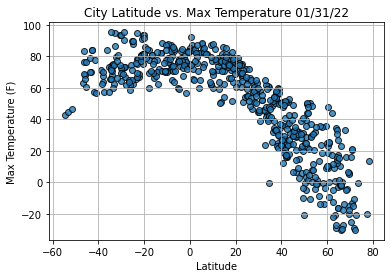

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

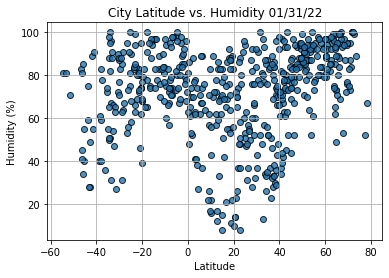

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

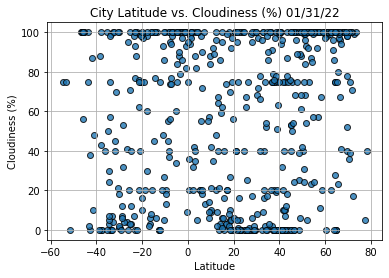

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

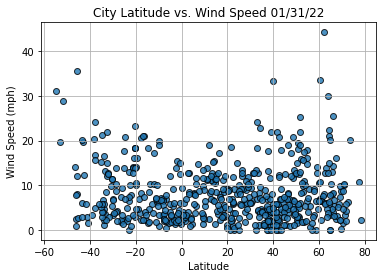

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

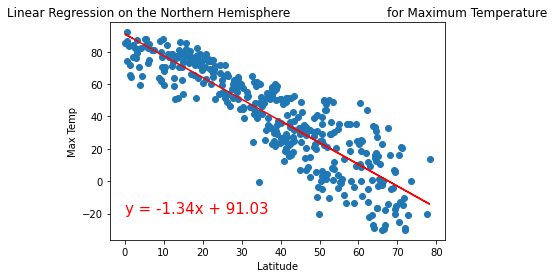

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))

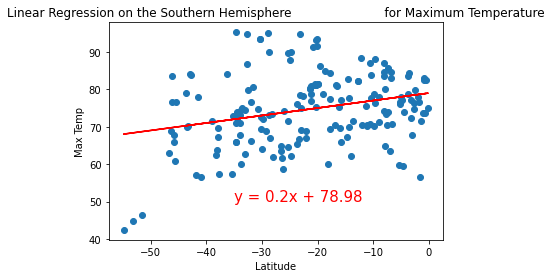

In [42]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-35,50))

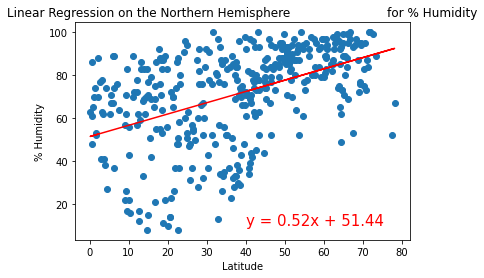

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

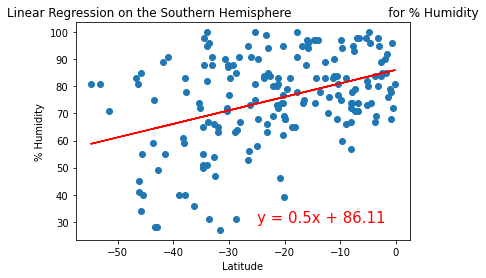

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,30))

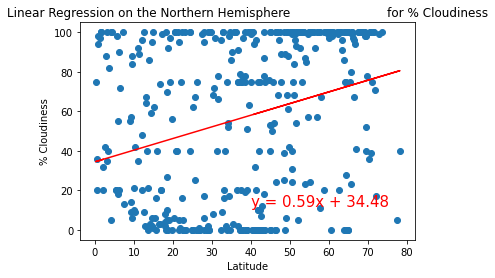

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,12))

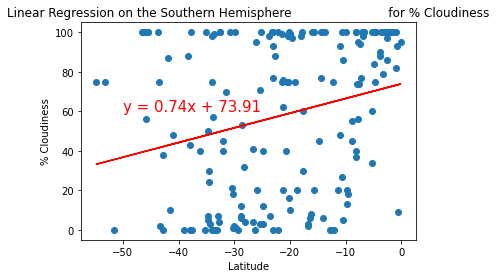

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

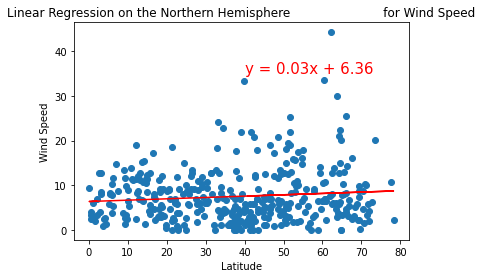

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(40,35))

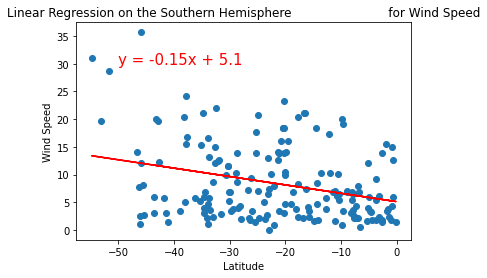

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))